In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# from xgboost import XGBRegressor
from IPython.display import clear_output
import torch
import torch.nn as nn
from torch.utils.data import Dataset
torch.manual_seed(20210614)
import itertools
import tensorflow
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
import time
from sklearn.gaussian_process import GaussianProcessRegressor

## In this notebook we are looking at:
- changes of different parameters by repeating simulations
- correlation between variables
- Pairplots of different variables

***As the number angles are different for `3 by 3` and `5 by 5` and `7 by 7` patterens we look at their pairplots and correlations sseparately***

### feature_names =
        ['Number_pieces', 'Length_ratio', 
             'angle1_9p','angle2_9','angle3_9p','angle4_9p',
             'angle1_25p','angle2_25p','angle3_25p','angle4_25p','angle5_25p','angle6_25p', 
             'angle1_49p','angle2_49p','angle3_49p','angle4_49p','angle5_49p','angle6_49p',
             'angle7_49p','angle8_49p',    ## some of the simulation result missing 'Avr_reactForce'
             'Safety_factor', 'Oop_deform', 'Tot_contactEngy',
             'Elast_strainEngy', 'Edge_temp', 'Avr_frictForce',
             'HeatRate', 'IntEngy', 'FricDissipRate'
            ]

In [4]:
df_ConstAng3 = pd.read_csv("Data/FE_constAng3_29param.csv")
df_ConstAng3_repeat = pd.read_csv("Data/FE_constAng3_repeat_29param.csv")
df_ConstAng3_repeat

,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,angle1_25p,angle2_25p,angle3_25p,angle4_25p,...,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
0,9.0,1.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.134965,0.252140,30.953301,4.410225,335.618938,3294.988331,116.018550,1814.370883,1.487035
1,9.0,1.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.138004,0.251663,32.512778,4.262204,329.346295,3039.697860,116.182790,1781.756737,1.568427
2,9.0,1.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,...,0.0,0.130636,0.148632,13.323739,1.459038,270.389538,1031.883047,115.609464,1420.487391,0.498277
3,9.0,1.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,...,0.0,0.130636,0.148632,13.323739,1.459038,270.389538,1031.883043,115.609464,1420.487391,0.498277
4,9.0,1.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,...,0.0,0.130636,0.148632,13.323739,1.459038,270.389538,1031.883045,115.609464,1420.487391,0.498277
5,9.0,1.0,24.0,24.0,24.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.132300,0.151473,14.759056,1.580704,277.600207,1215.109315,108.726055,1453.892592,0.674683


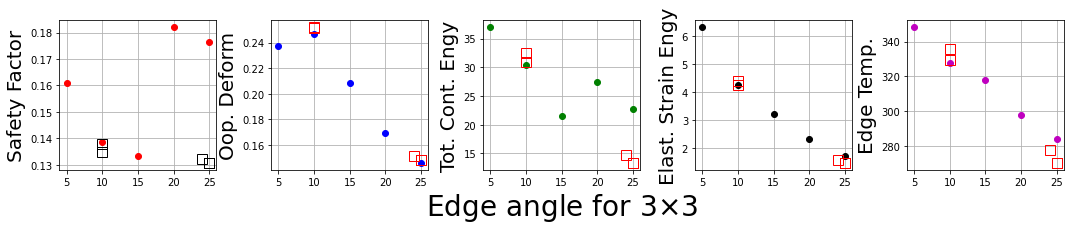

In [6]:
fig = plt.figure(figsize=(18,2.75))
plt.subplots_adjust(wspace = 0.35)

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Safety_factor, 'or')
ax1.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Safety_factor, 'sk', mfc='None', ms=10)

ax2.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Oop_deform, 'ob')
ax2.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Oop_deform, 'sr', mfc='None', ms=10)

ax3.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Tot_contactEngy, 'og')
ax3.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Tot_contactEngy, 'sr', mfc='None', ms=10)

ax4.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Elast_strainEngy, 'ok')
ax4.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Elast_strainEngy, 'sr', mfc='None', ms=10)

ax5.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Edge_temp, 'om')
ax5.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Edge_temp, 'sr', mfc='None', ms=10)


ax1.set_ylabel('Safety Factor', fontsize=20)
ax2.set_ylabel('Oop. Deform', fontsize=20)
ax3.set_ylabel('Tot. Cont. Engy', fontsize=20)
ax4.set_ylabel('Elast. Strain Engy', fontsize=20)
ax5.set_ylabel('Edge Temp.', fontsize=20)
ax3.set_xlabel('Edge angle for 3$\\times$3', fontsize=28)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
plt.savefig('Graphs/ConstAng3by3_repeat_01.png',bbox_inches='tight')
plt.show()

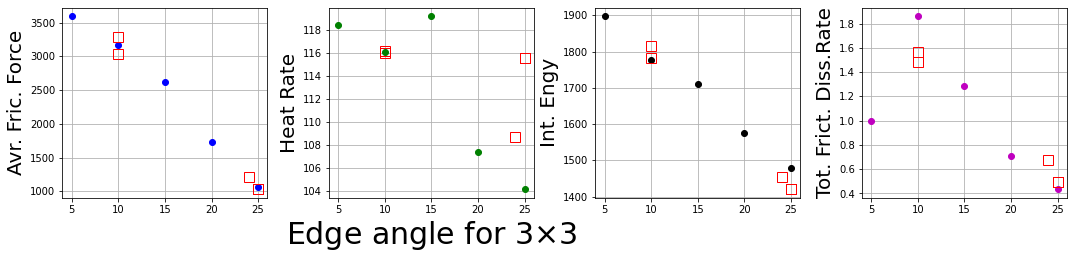

In [7]:
fig = plt.figure(figsize=(18,3.5))
plt.subplots_adjust(wspace = 0.3)

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)


ax1.plot(df_ConstAng3.angle1_9p, df_ConstAng3.Avr_frictForce, 'ob')
ax1.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.Avr_frictForce, 'sr',mfc='None',ms=10)

ax2.plot(df_ConstAng3.angle1_9p, df_ConstAng3.HeatRate, 'og')
ax2.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.HeatRate, 'sr',mfc='None',ms=10)

ax3.plot(df_ConstAng3.angle1_9p, df_ConstAng3.IntEngy, 'ok')
ax3.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.IntEngy, 'sr',mfc='None',ms=10)

ax4.plot(df_ConstAng3.angle1_9p, df_ConstAng3.FricDissipRate, 'om')
ax4.plot(df_ConstAng3_repeat.angle1_9p, df_ConstAng3_repeat.FricDissipRate, 'sr',mfc='None',ms=10)


ax1.set_ylabel('Avr. Fric. Force', fontsize=20)
ax2.set_ylabel('Heat Rate', fontsize=20)
ax3.set_ylabel('Int. Engy', fontsize=20)
ax4.set_ylabel('Tot. Frict. Diss.Rate', fontsize=20)
ax2.set_xlabel('Edge angle for 3$\\times$3', fontsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.savefig('Graphs/ConstAng3by3_repeat_02.png',bbox_inches='tight')

plt.show()

In [8]:
df_ConstAng3 = pd.read_csv("Data/FE_constAng3_29param.csv")

df_VarSize_Ang3 = pd.read_csv("Data/FE_Var_SizeAngle3_29param.csv")

df_VarSize_ConstAng3 = pd.read_csv("Data/FE_Var_SizeConstAng3_29param.csv")

df_VarAng3 = pd.read_csv("Data/FE_varAng3_29param.csv")

df_combined3 = pd.concat([df_ConstAng3, df_VarSize_Ang3, df_VarSize_ConstAng3, df_VarAng3 
                       ], axis = 0, ignore_index = True)

df_clean3 = df_combined3.drop(df_combined3.iloc[:,6:20], axis = 'columns')
df_clean3


,Number_pieces,Length_ratio,angle1_9p,angle2_9,angle3_9p,angle4_9p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
0,9.0,1.0,15.0,15.0,15.0,15.0,0.133109,0.208235,21.553241,3.207184,317.891231,2613.656328,119.242100,1710.675309,1.282585
1,9.0,1.0,10.0,10.0,10.0,10.0,0.138542,0.246983,30.392595,4.255655,327.754665,3171.590005,116.168460,1777.013357,1.861968
2,9.0,1.0,20.0,20.0,20.0,20.0,0.182043,0.169438,27.469833,2.326841,298.175059,1734.154533,107.459122,1574.562635,0.706615
3,9.0,1.0,25.0,25.0,25.0,25.0,0.176432,0.145976,22.668898,1.699087,283.991600,1070.833554,104.196553,1477.591126,0.435776
4,9.0,1.0,5.0,5.0,5.0,5.0,0.160783,0.237627,36.995334,6.330834,348.295627,3596.705318,118.496228,1897.462441,0.997739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,9.0,1.0,25.0,20.0,5.0,25.0,0.210320,0.222657,13.125733,1.277365,254.262770,767.389849,113.309028,1412.833098,0.666406
70,9.0,1.0,5.0,25.0,25.0,10.0,0.168541,0.332753,19.196659,3.565091,317.474055,817.345669,124.296492,1644.669238,1.124226
71,9.0,1.0,15.0,10.0,15.0,10.0,0.146497,0.185452,16.603293,2.502842,284.998527,773.147305,122.041306,1560.209793,0.963143
72,9.0,1.0,25.0,20.0,15.0,10.0,0.232505,0.089153,34.045036,7.190073,244.587845,1057.921614,118.059187,1464.468113,0.986578


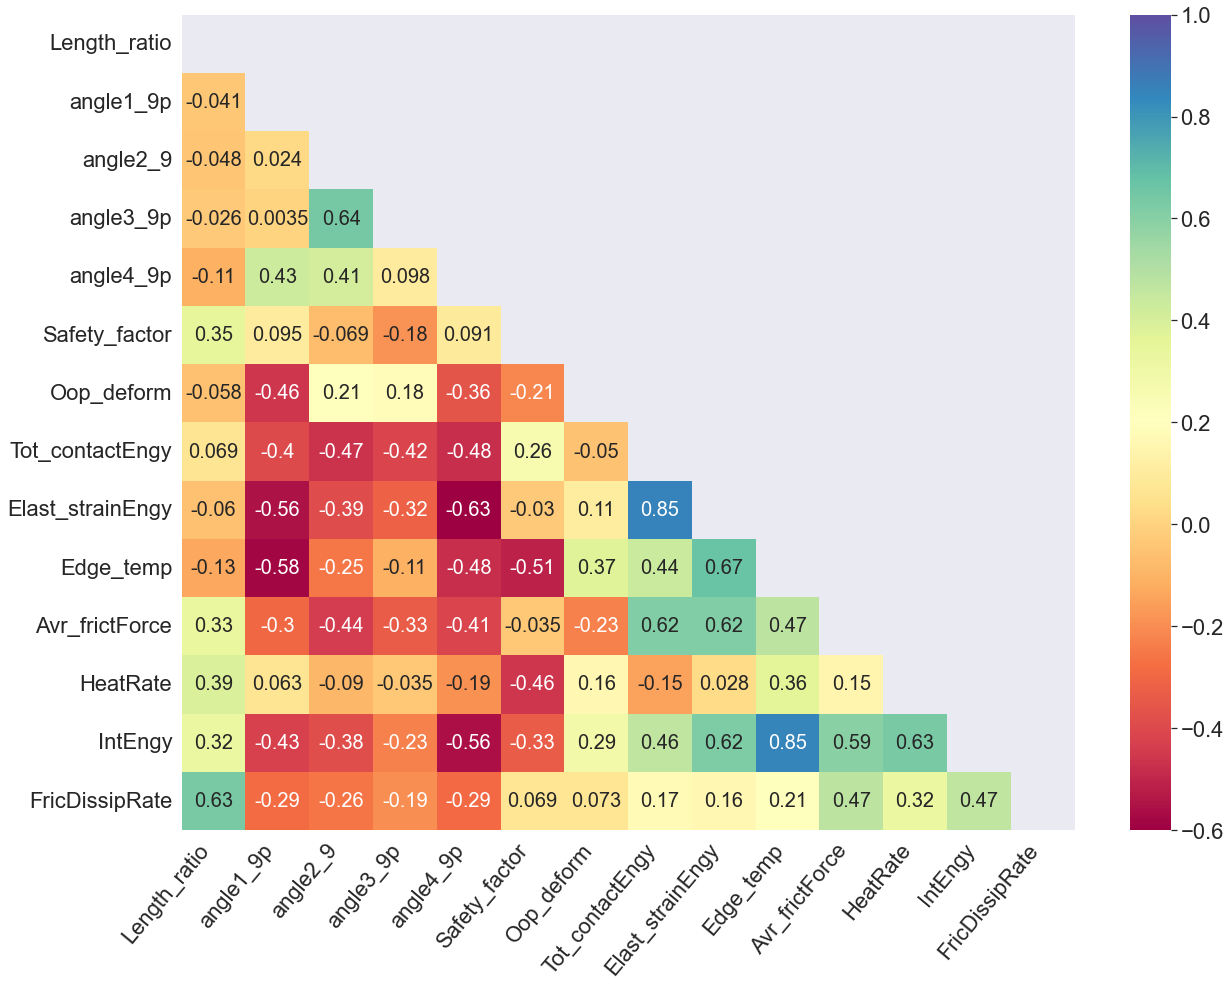

In [11]:
fig= plt.figure(figsize=(20,15))

sns.set(font_scale=2)

corr = df_clean3.iloc[:,1:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


heatmap = sns.heatmap(df_clean3.iloc[:,1:].corr(), 
                      annot=True, annot_kws={'size': 20},
                      cmap="Spectral", vmin=-0.6, vmax=1,
                      cbar=True, xticklabels=True, mask=mask)

heatmap.set_xticklabels(heatmap.get_xticklabels(),
                        rotation=50, horizontalalignment='right'
                       )
plt.savefig('CleanGraphs/3by3_corr.png',bbox_inches='tight')
plt.show()

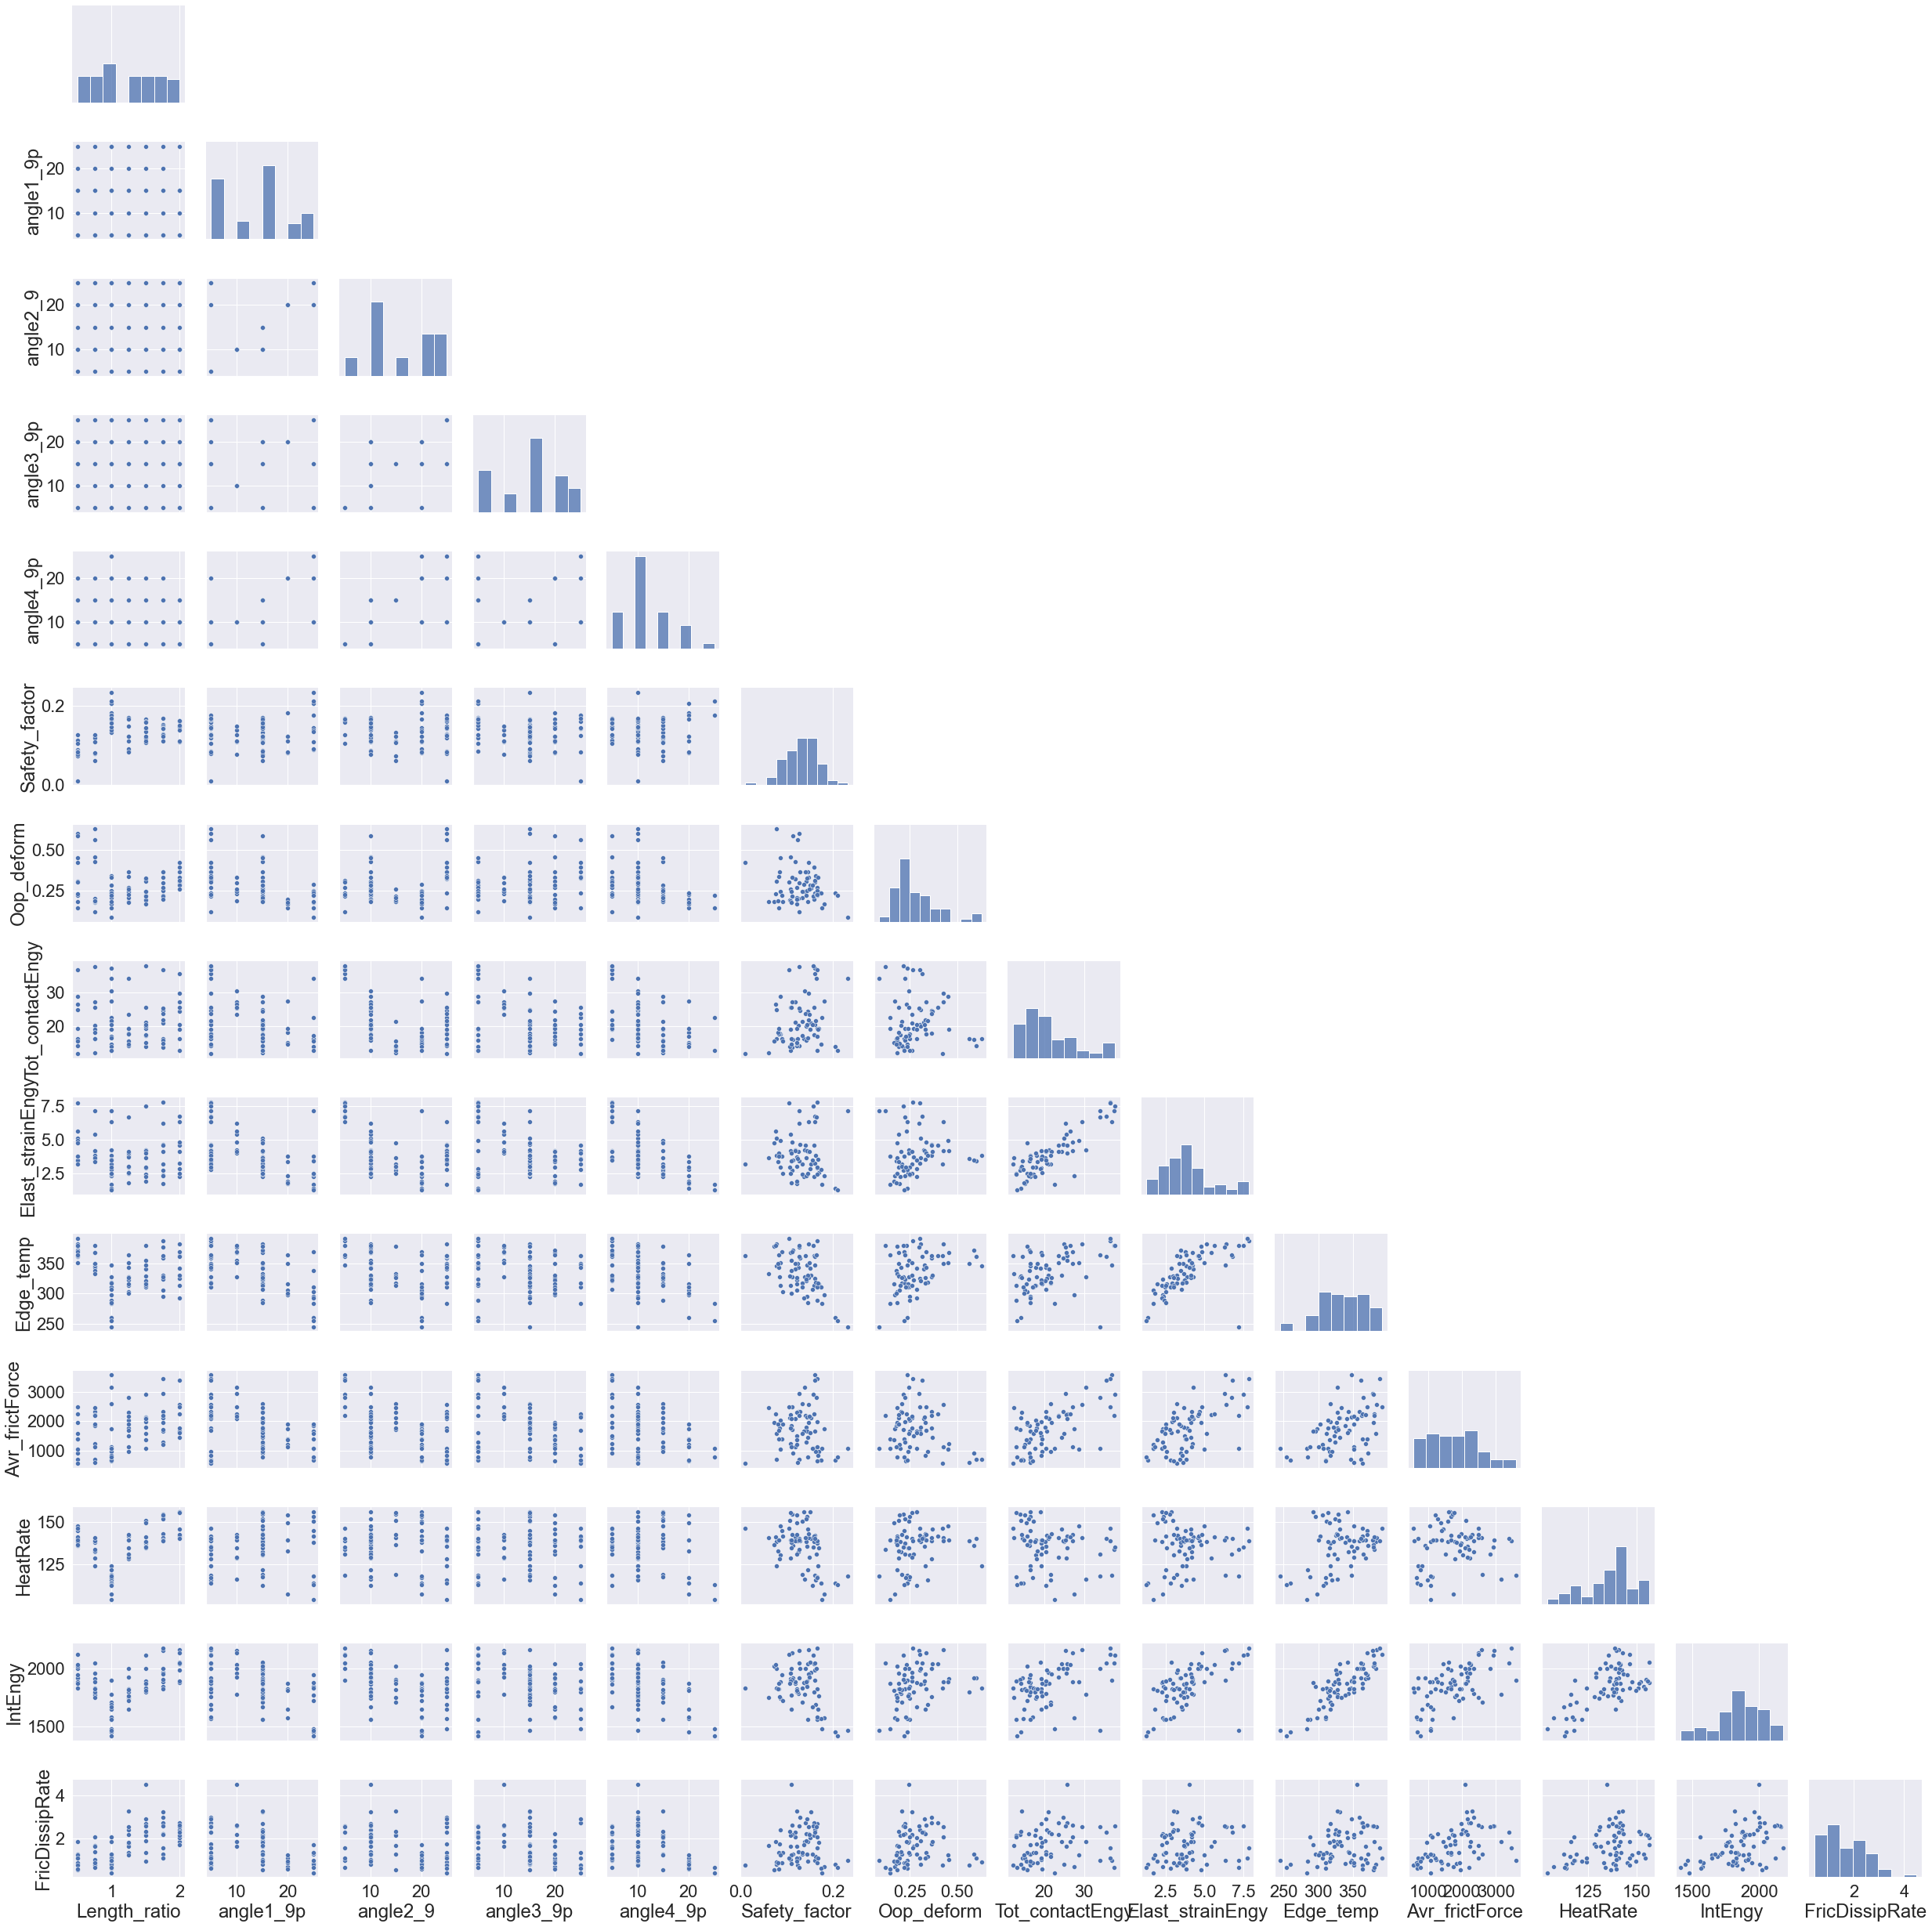

In [38]:
"""'Safety_factor', 'Oop_deform', 'Tot_contactEngy',
         'Elast_strainEngy', 'Edge_temp', 'Avr_frictForce',
         'HeatRate', 'IntEngy', 'FricDissipRate'"""
##### Pairplot
sns.pairplot(data = df_clean3.iloc[:,1:], corner = True )
plt.savefig('CleanGraphs/3by3pairplot.png')
plt.show()

########## PairGrid
# data = df_clean3.iloc[:,1:]
# g = sns.PairGrid(data, diag_sharey=False, corner=True)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.savefig('CleanGraphs/3by3pairplot.png')


In [42]:
df_ConstAng5 = pd.read_csv("Data/FE_constAng5_29param.csv")

df_VarAng5 = pd.read_csv("Data/FE_varAng5_29param.csv")

df_combined5 = pd.concat([df_ConstAng5, df_VarAng5 
                       ], axis = 0, ignore_index = True)

df_half = df_combined5.drop(df_combined5.iloc[:,2:6], axis = 'columns')

df_clean5 = df_half.drop(df_half.iloc[:,8:16], axis = 'columns')
df_clean5

,Number_pieces,Length_ratio,angle1_25p,angle2_25p,angle3_25p,angle4_25p,angle5_25p,angle6_25p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
0,25.0,1.0,15.0,15.0,15.0,15.0,15.0,15.0,0.154482,0.110424,32.384051,5.452310,293.222186,3634.126174,128.764818,1715.186770,1.221292
1,25.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,0.188957,0.099219,40.502037,7.640411,300.878396,4753.636702,121.509130,1767.479431,1.581790
2,25.0,1.0,20.0,20.0,20.0,20.0,20.0,20.0,0.146635,0.095833,26.152101,4.348632,293.036414,3218.878198,125.459886,1707.154459,0.961471
3,25.0,1.0,25.0,25.0,25.0,25.0,25.0,25.0,0.118172,0.094015,8.866105,4.218235,290.756144,2635.471526,118.167360,1846.394447,0.646005
4,25.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,0.215965,0.072402,48.908318,9.845241,304.344013,5242.863727,121.682184,1786.565872,0.747337
5,25.0,1.0,15.0,10.0,5.0,15.0,5.0,15.0,0.207165,0.186244,34.668973,4.833160,273.766681,1384.284966,123.209527,1618.956990,2.081008
6,25.0,1.0,5.0,25.0,15.0,10.0,20.0,25.0,0.157891,0.167342,28.236446,5.409357,277.877727,2080.358284,123.870371,1585.691563,1.113889
7,25.0,1.0,5.0,25.0,25.0,20.0,15.0,10.0,0.174172,0.105947,28.094128,4.306530,284.369580,1518.454733,119.592863,1618.124009,1.014758
8,25.0,1.0,20.0,5.0,20.0,20.0,20.0,20.0,0.195268,0.160021,26.536503,4.361297,282.387805,1401.689559,130.549333,1703.895101,1.409491
9,25.0,1.0,20.0,20.0,20.0,20.0,10.0,20.0,0.104338,0.130346,24.997063,3.533611,272.603735,3026.968573,124.605128,1586.112242,1.454014


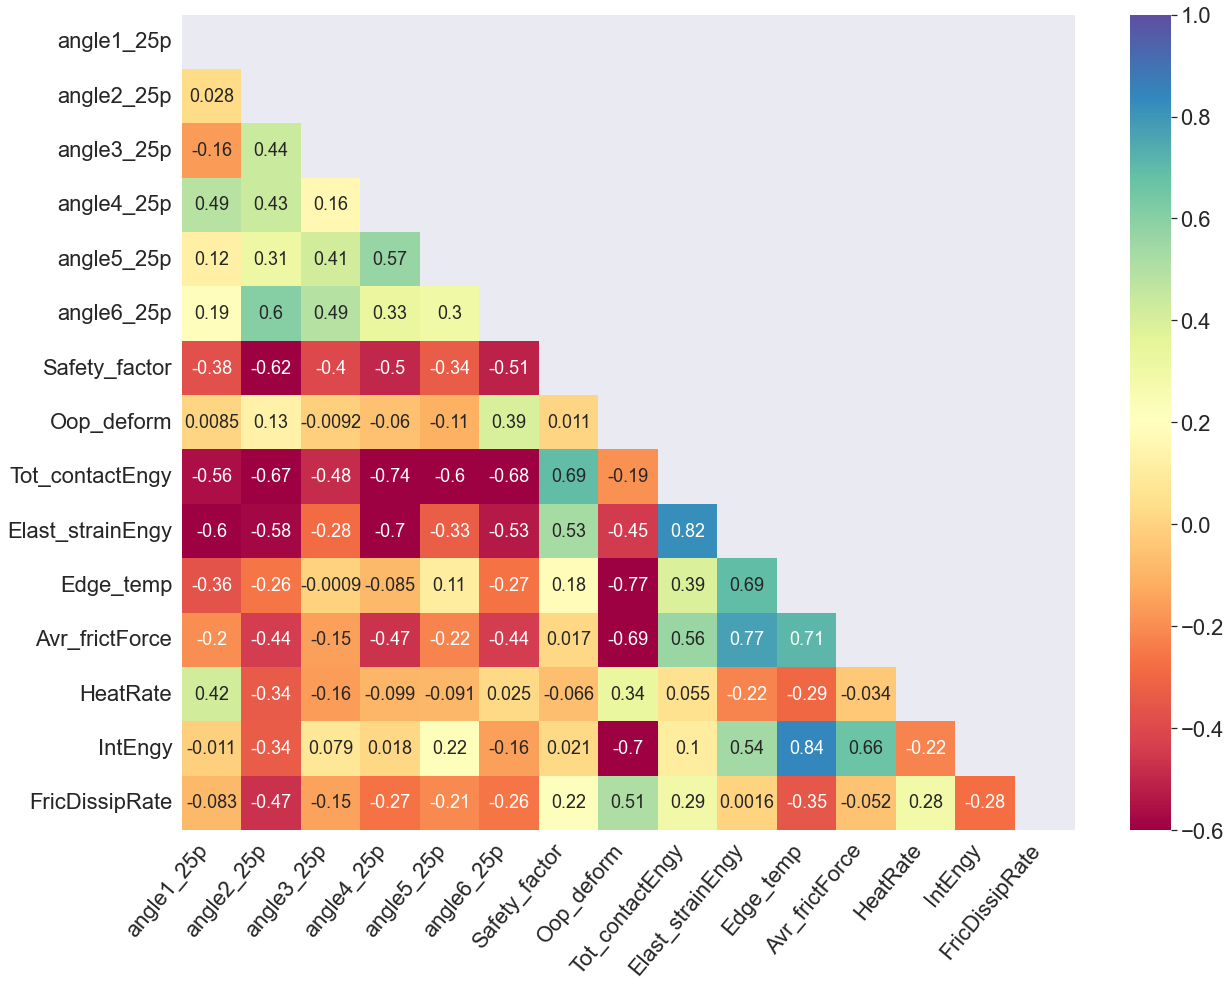

In [45]:
fig= plt.figure(figsize=(20,15))

sns.set(font_scale=2)

corr = df_clean5.iloc[:,2:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


heatmap = sns.heatmap(df_clean5.iloc[:,2:].corr(), 
                      annot=True, annot_kws={'size': 18},
                      cmap="Spectral", vmin=-0.6, vmax=1,
                      cbar=True, xticklabels=True, mask=mask)

heatmap.set_xticklabels(heatmap.get_xticklabels(),
                        rotation=50, horizontalalignment='right'
                       )
plt.savefig('CleanGraphs/5by5_corr.png',bbox_inches='tight')
plt.show()

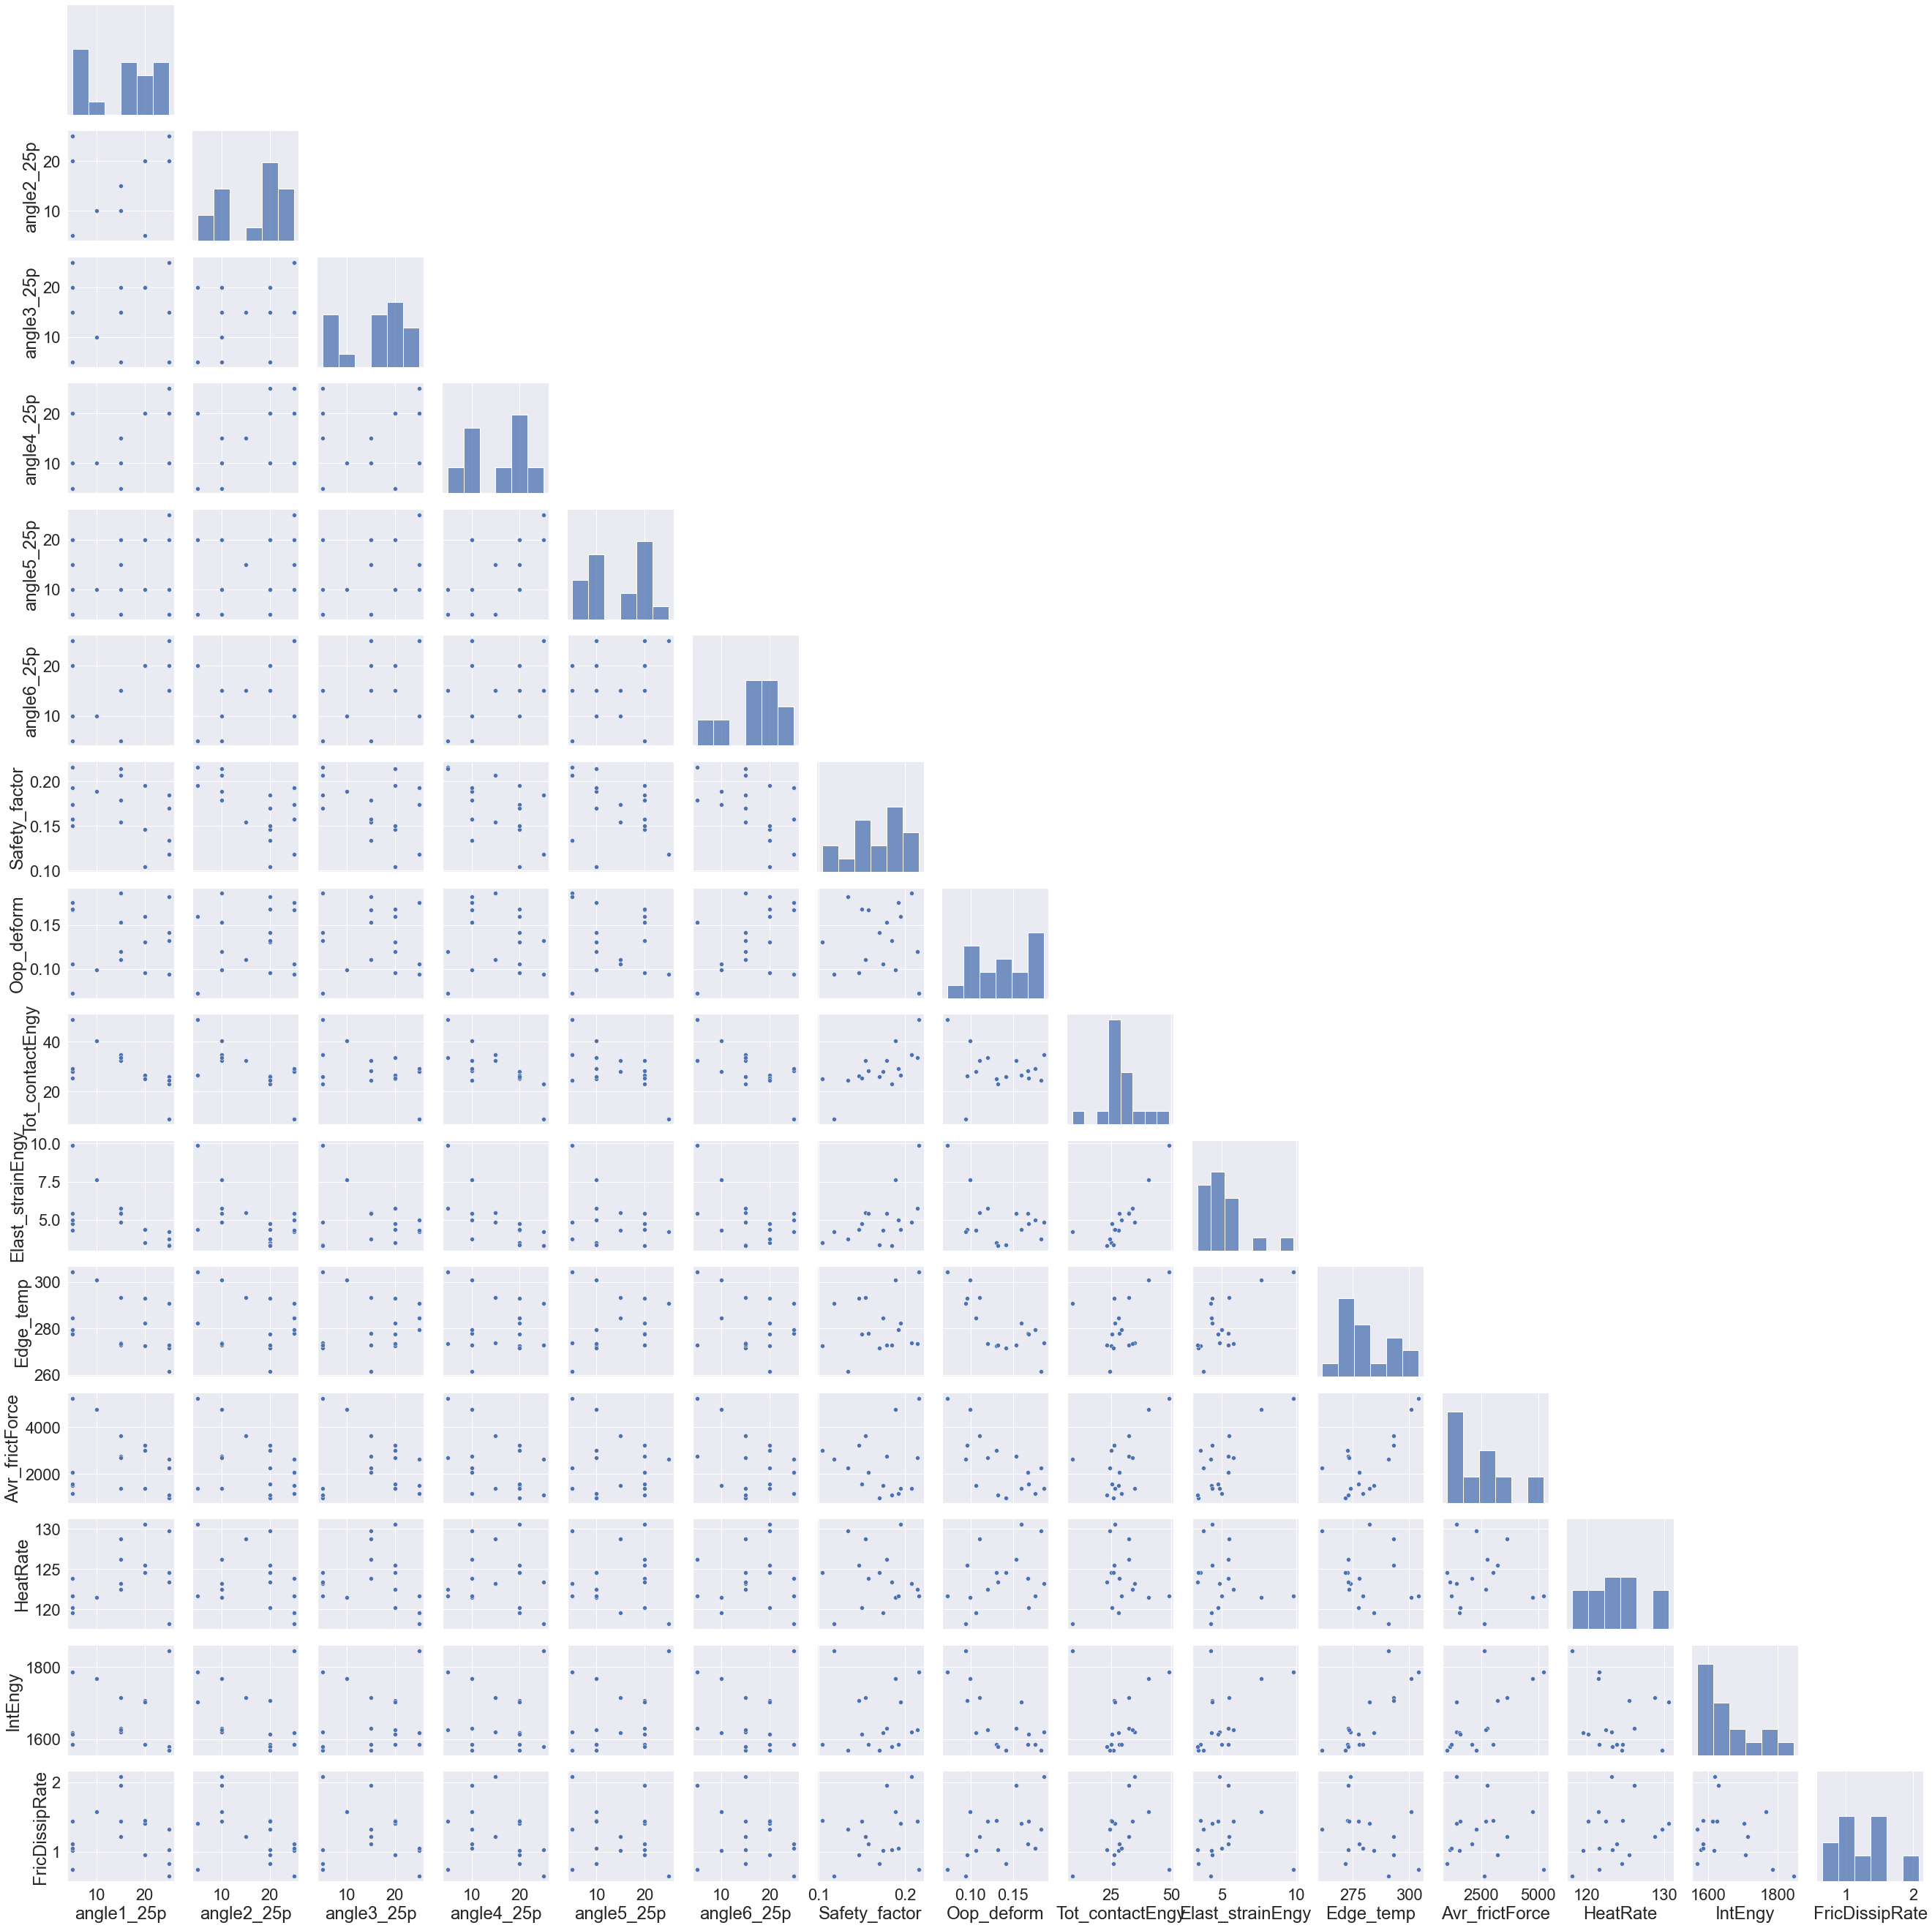

In [46]:
sns.pairplot(data = df_clean5.iloc[:,2:], corner = True )
plt.savefig('CleanGraphs/5by5pairplot.png')
plt.show()

In [47]:
df_ConstAng7 = pd.read_csv("Data/FE_constAng7_29param.csv")

df_VarAng7 = pd.read_csv("Data/FE_varAng7_29param.csv")

df_combined7 = pd.concat([df_ConstAng7, df_VarAng7 
                       ], axis = 0, ignore_index = True)

df_clean7 = df_combined7.drop(df_combined7.iloc[:,2:12], axis = 'columns')

df_clean7

,Number_pieces,Length_ratio,angle1_49p,angle2_49p,angle3_49p,angle4_49p,angle5_49p,angle6_49p,angle7_49p,angle8_49p,Safety_factor,Oop_deform,Tot_contactEngy,Elast_strainEngy,Edge_temp,Avr_frictForce,HeatRate,IntEngy,FricDissipRate
0,49.0,1.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.225385,0.069679,30.992188,7.269596,246.063226,4558.190211,108.748657,1503.266958,1.164482
1,49.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.268781,0.115449,48.231387,10.703491,227.439878,3238.018699,126.111487,1408.766874,1.473144
2,49.0,1.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.259697,0.086255,40.411052,9.098184,238.417429,3323.659312,120.289490,1470.360137,1.374585
3,49.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.246687,0.071311,69.722707,17.374855,252.189540,3510.091653,111.012411,1558.971232,0.761163
4,49.0,1.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,0.200355,0.063884,23.438549,5.430635,240.802158,4016.525574,121.807038,1450.739290,0.947002
5,49.0,1.0,15.0,10.0,5.0,15.0,5.0,15.0,20.0,10.0,0.206761,0.149850,41.868938,8.522195,229.297447,1447.251535,119.876092,1406.529514,1.718456
6,49.0,1.0,5.0,25.0,15.0,10.0,20.0,25.0,15.0,15.0,0.157891,0.167342,28.236446,5.409357,277.877727,2080.358284,123.870371,1585.691563,1.113889
7,49.0,1.0,5.0,25.0,25.0,20.0,15.0,10.0,25.0,10.0,0.232006,0.092236,32.551146,7.039813,232.996685,1412.634400,113.413366,1475.895909,1.128734
8,49.0,1.0,20.0,5.0,20.0,20.0,20.0,20.0,20.0,20.0,0.172030,0.122319,31.204325,8.306639,243.408835,1904.697988,107.908684,1513.411343,1.285913
9,49.0,1.0,20.0,20.0,20.0,20.0,10.0,20.0,20.0,20.0,0.176662,0.103822,32.786812,6.666456,247.473155,2068.034384,112.240804,1480.473427,1.345820


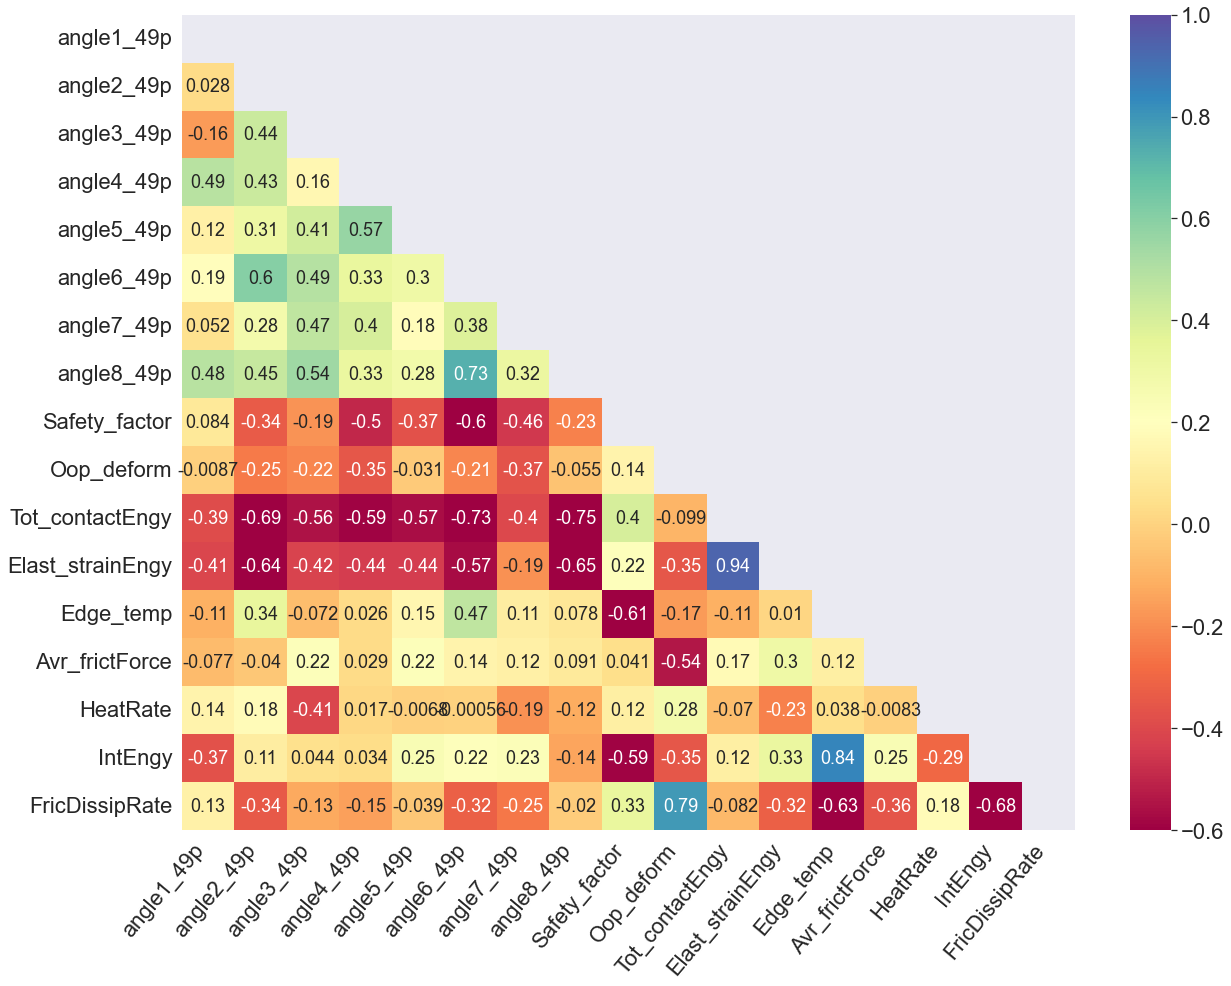

In [48]:
fig= plt.figure(figsize=(20,15))

sns.set(font_scale=2)

corr = df_clean7.iloc[:,2:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


heatmap = sns.heatmap(df_clean7.iloc[:,2:].corr(), 
                      annot=True, annot_kws={'size': 18},
                      cmap="Spectral", vmin=-0.6, vmax=1,
                      cbar=True, xticklabels=True, mask=mask)

heatmap.set_xticklabels(heatmap.get_xticklabels(),
                        rotation=50, horizontalalignment='right'
                       )
plt.savefig('CleanGraphs/7by7_corr.png',bbox_inches='tight')
plt.show()

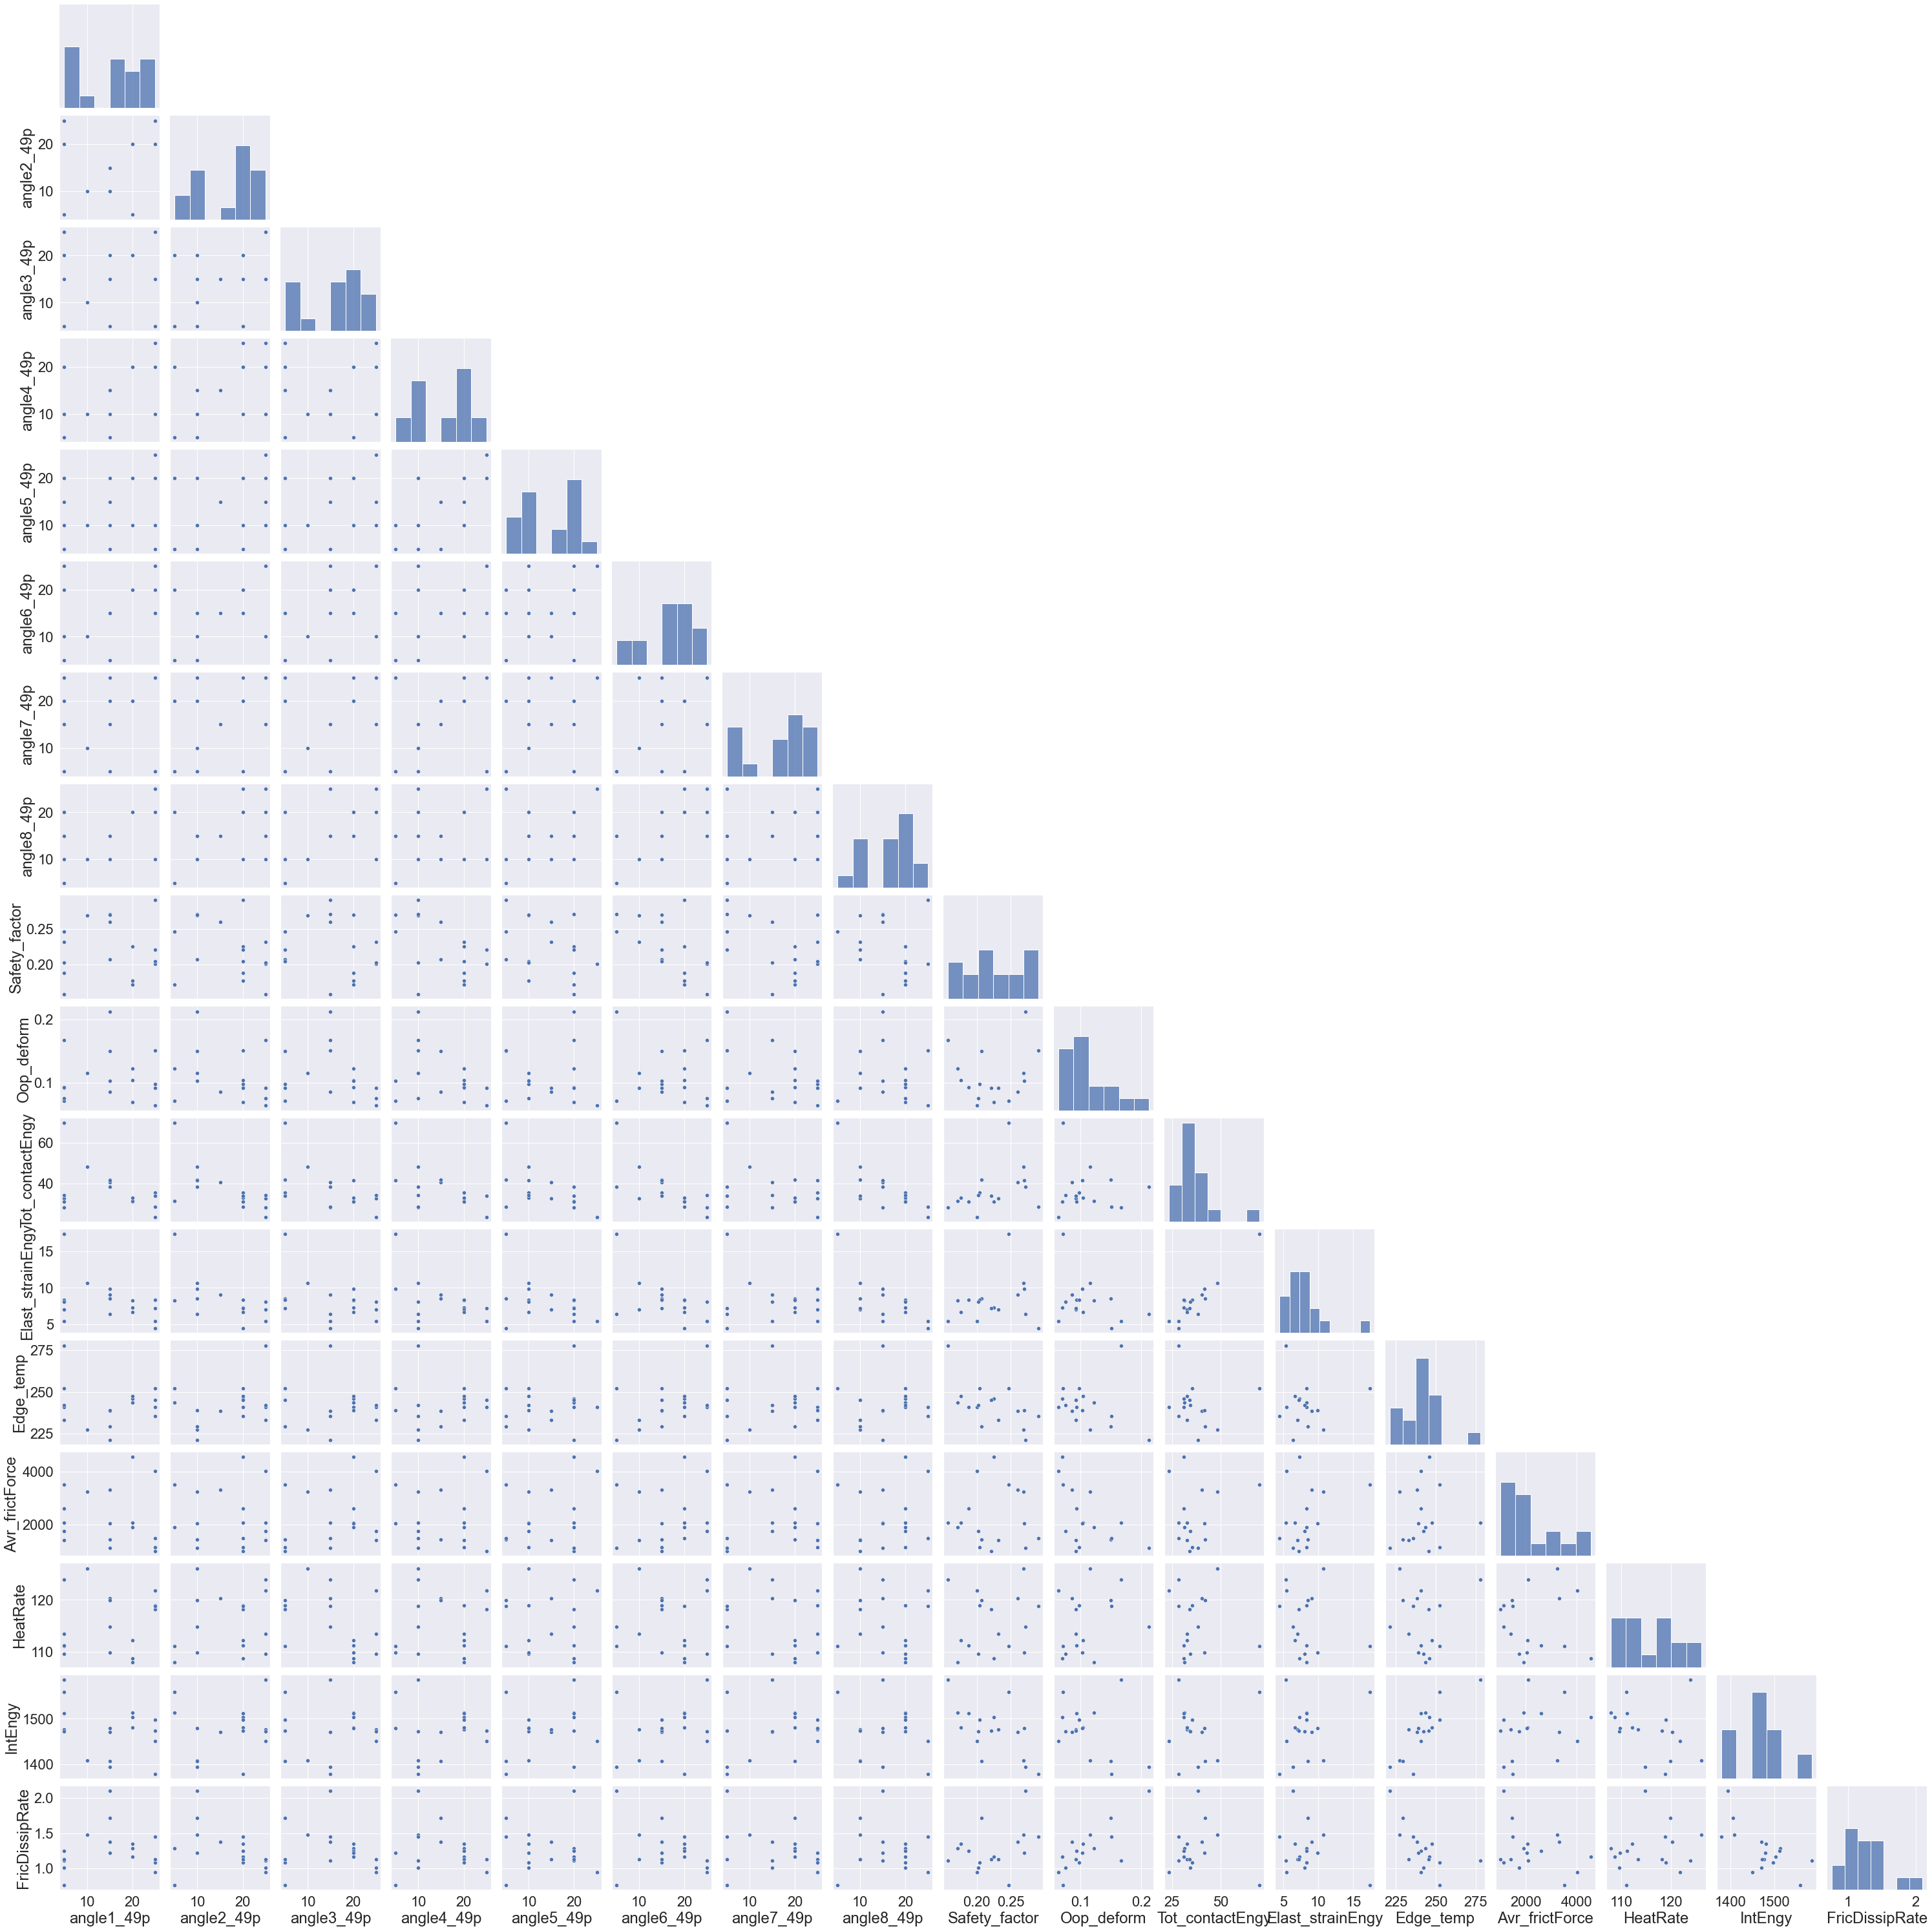

In [49]:
sns.pairplot(data = df_clean7.iloc[:,2:], corner = True )
plt.savefig('CleanGraphs/7by7pairplot.png')
plt.show()